In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from geodatasets import get_path
import plotly.express as px
import plotly.offline as py
from mpl_toolkits.mplot3d import Axes3D
from shapely.geometry import LineString


In [2]:
states=gpd.read_file('Data/usa-states-census-2014.shp')

In [3]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.4672 0, -118.4..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0, -77.04102 38..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0, -81.75..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0, -85.47434 34..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0, -117.21507 ..."


In [4]:
states.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
states = states.to_crs("EPSG:3395")

<Axes: >

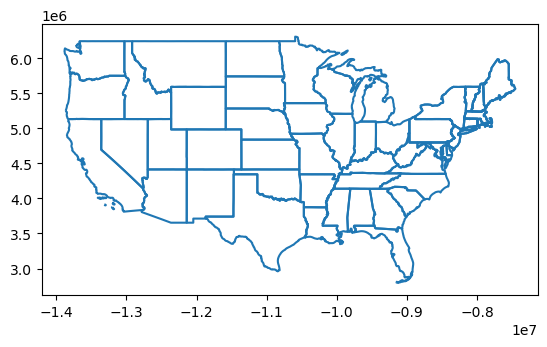

In [6]:
states.boundary.plot()

In [7]:
sdf=gpd.read_file('us_tornado_dataset.csv')
sdf.head()

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid
0,1950,1,3,1950-01-03,IL,3,3,0,39.1,-89.3,39.12,-89.23,3.6,130
1,1950,1,3,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150
2,1950,1,3,1950-01-03,OH,1,1,0,40.88,-84.58,0.0,0.0,0.1,10
3,1950,1,13,1950-01-13,AR,3,1,1,34.4,-94.37,0.0,0.0,0.6,17
4,1950,1,25,1950-01-25,IL,2,0,0,41.17,-87.33,0.0,0.0,0.1,100


In [8]:
# Convert the tornado dataset to a GeoDataFrame
sdf_gdf = gpd.GeoDataFrame(
    sdf, geometry=gpd.points_from_xy(sdf.elon, sdf.elat), crs="EPSG:4326"
)

# Convert the CRS to match the states CRS (EPSG:3395)
sdf_gdf = sdf_gdf.to_crs("EPSG:3395")

In [9]:
print(sdf_gdf['mag'].dtype)

object


In [10]:
sdf_gdf['mag'] = pd.to_numeric(sdf_gdf['mag'], errors='coerce')

In [11]:
print(sdf_gdf['mag'].dtype)

int64


In [12]:
#drop null values
sdf_gdf = sdf_gdf.dropna(subset=['mag'])

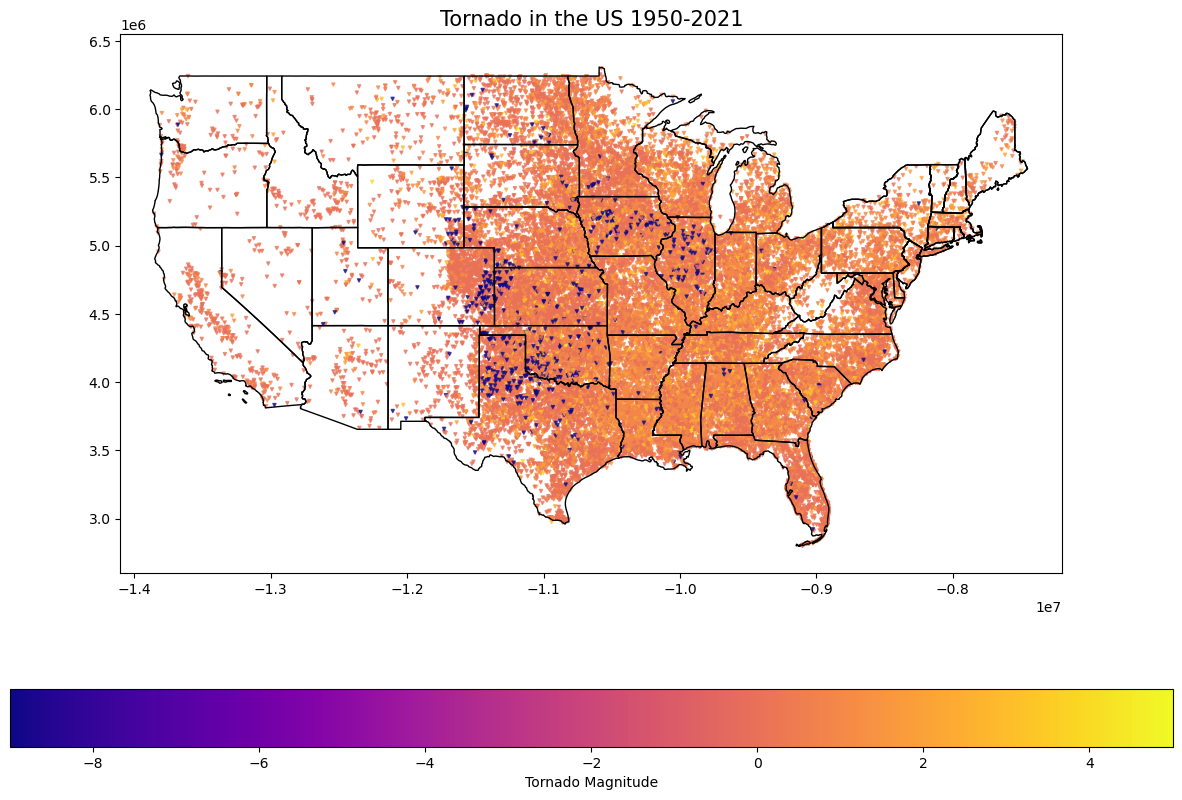

In [13]:

# Create a plot
fig, ax = plt.subplots(figsize=(15, 10))
# US Lower 48 Bounding Box
ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)

# Plot the states
states.boundary.plot(ax=ax, linewidth=1, color='black')

# Plot the tornadoes with color based on magnitude
sdf_gdf.plot(column='mag', ax=ax, legend=True, 
             legend_kwds={'label': "Tornado Magnitude", 'orientation': "horizontal"},marker='v',
             markersize=5, cmap='plasma', alpha=0.7)

# Set plot title
plt.title('Tornado in the US 1950-2021', fontsize=15)

# Show the plot
plt.show()

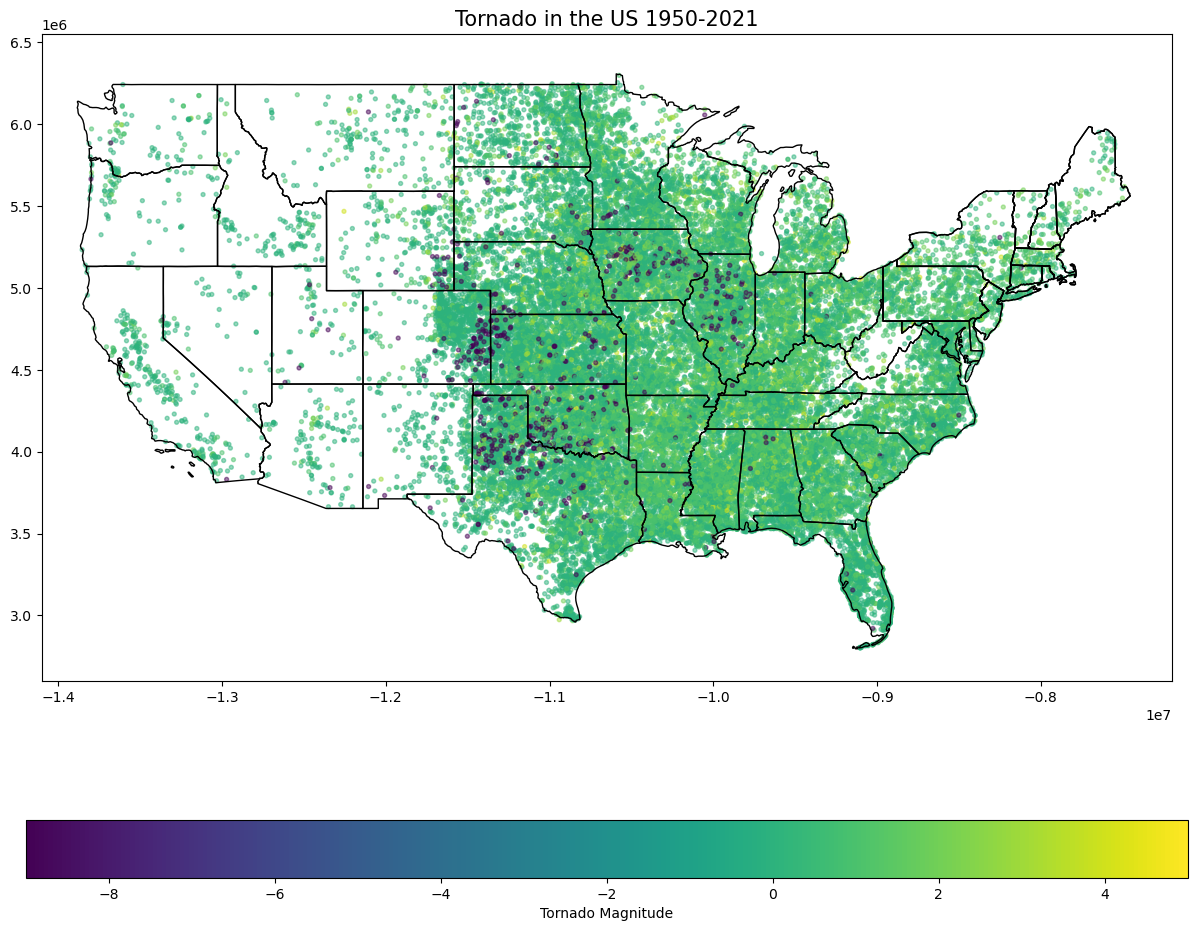

In [20]:
sdf_gdf = sdf_gdf.dropna(subset=['mag'])

# Create a plot
fig, ax = plt.subplots(figsize=(15,12))
# US Lower 48 Bounding Box
ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)

# Plot the states
states.boundary.plot(ax=ax, linewidth=1, color='black')

sdf_gdf.plot(column='mag', ax=ax, legend=True, 
             legend_kwds={'label': "Tornado Magnitude", 'orientation': "horizontal"},
             markersize=8, cmap='viridis', alpha=0.5)

# Set Title
plt.title('Tornado in the US 1950-2021', fontsize=15)

# Showing the plot
plt.show()

In [21]:
sdf['path'] = sdf.apply(lambda row: LineString([(row.slon, row.slat), (row.elon, row.elat)]), axis=1)

In [22]:
sdf.head()

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid,path
0,1950,1,3,1950-01-03,IL,3,3,0,39.1,-89.3,39.12,-89.23,3.6,130,"LINESTRING (-89.3 39.1, -89.23 39.12)"
1,1950,1,3,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150,"LINESTRING (-90.22 38.77, -90.03 38.83)"
2,1950,1,3,1950-01-03,OH,1,1,0,40.88,-84.58,0.0,0.0,0.1,10,"LINESTRING (-84.58 40.88, 0 0)"
3,1950,1,13,1950-01-13,AR,3,1,1,34.4,-94.37,0.0,0.0,0.6,17,"LINESTRING (-94.37 34.4, 0 0)"
4,1950,1,25,1950-01-25,IL,2,0,0,41.17,-87.33,0.0,0.0,0.1,100,"LINESTRING (-87.33 41.17, 0 0)"


In [23]:
twister= sdf.copy()
twister['tornados'] = 1
twister = twister[['st','tornados']].groupby('st').count()
twister.sort_values('tornados', ascending=False)

,tornados
st,
TX,9149
KS,4375
OK,4092
FL,3497
NE,2967
IA,2773
IL,2682
MS,2476
MO,2427


<Axes: title={'center': 'Tornados by State(1950-2021)'}, xlabel='st'>

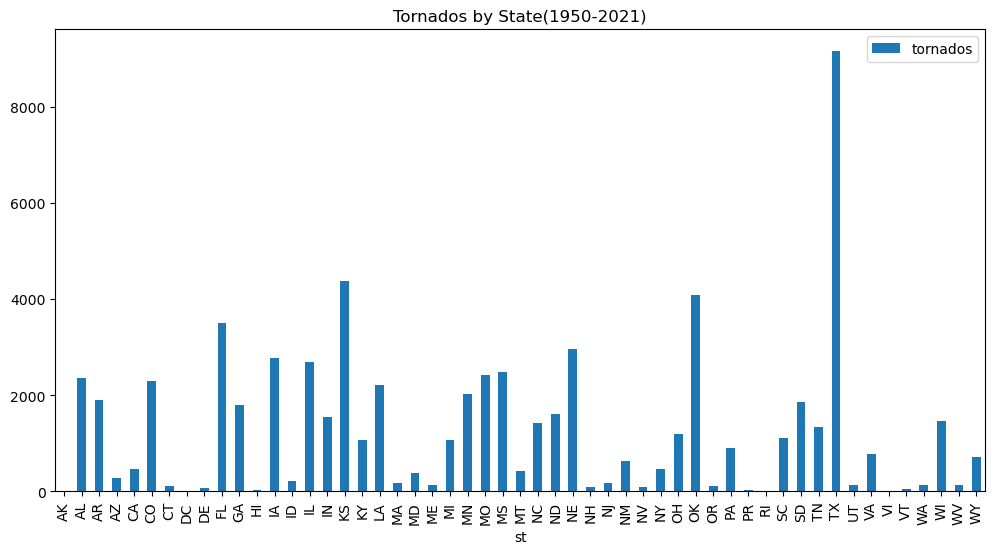

In [24]:
twister.plot.bar(figsize=(12,6),title ='Tornados by State(1950-2021)')


In [86]:
texas = states[states['STUSPS'] == 'TX'] 

/var/folders/7w/wrttw6653ynbyb_3tkkll8kh0000gn/T/ipykernel_47528/2547111084.py:3: DeprecationWarning:

The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.



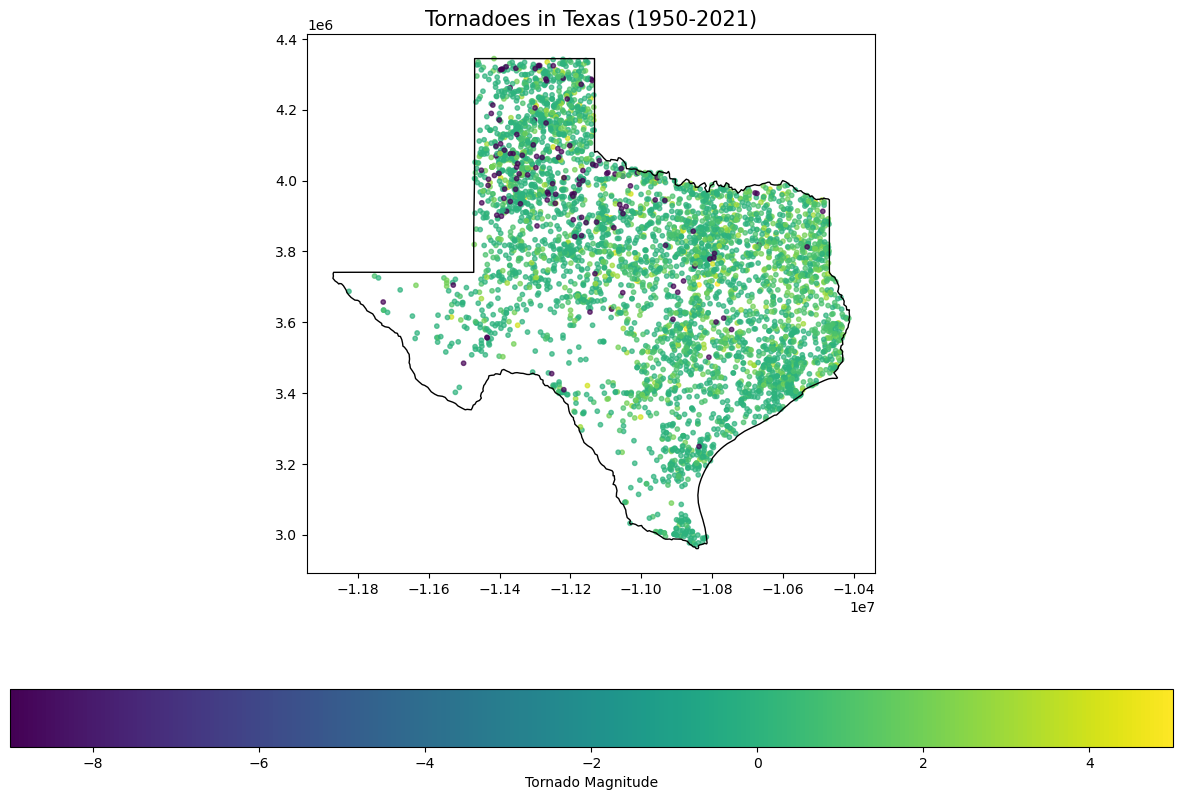

In [87]:
# Filter tornado data to include only tornadoes in Texas

sdf_texas = sdf_gdf[sdf_gdf.geometry.within(texas.geometry.unary_union)]

# Create a plot
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the Texas boundary
texas.boundary.plot(ax=ax, linewidth=1, color='black')


# Plot the tornadoes in Texas with color based on magnitude
sdf_texas.plot(column='mag', ax=ax, legend=True,
               legend_kwds={'label': "Tornado Magnitude", 'orientation': "horizontal"},
               markersize=10, cmap='viridis', alpha=0.7)

# Set plot title
plt.title('Tornadoes in Texas (1950-2021)', fontsize=15)
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



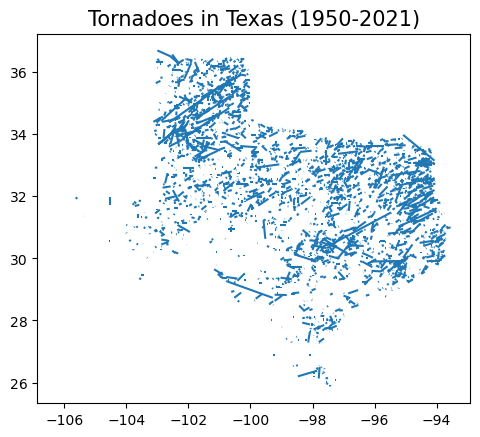

In [88]:
sdf_texas['path'] = sdf.apply(lambda row: LineString([(row.slon, row.slat), (row.elon, row.elat)]), axis=1)

gdf=gpd.GeoDataFrame(sdf_texas,geometry='path')
gdf.plot()
plt.title('Tornadoes in Texas (1950-2021)', fontsize=15)
plt.show()